<a href="https://colab.research.google.com/github/drkwdck/sin-regression/blob/master/sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [0]:
import torch

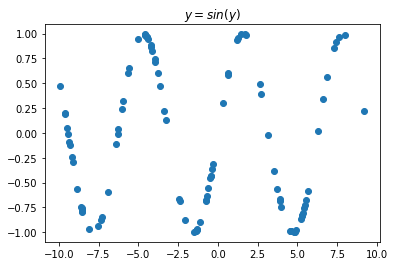

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y=sin(y)$');

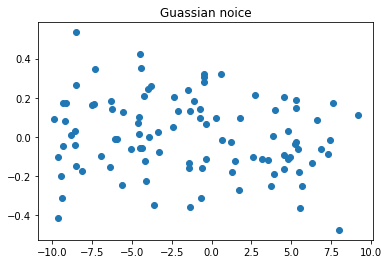

In [4]:
noice = torch.randn(y_train.shape) / 5

plt.plot(x_train.numpy(), noice.numpy(), 'o')
plt.title('Guassian noice');

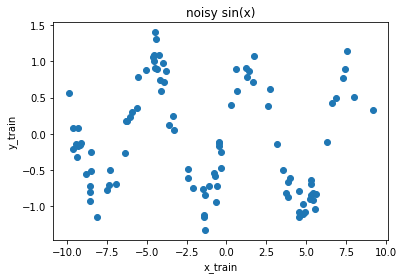

In [5]:
y_train += noice
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

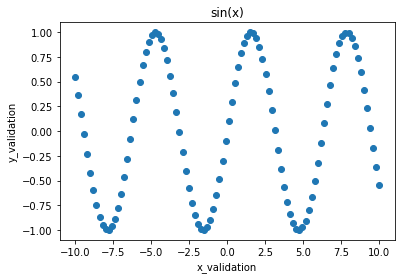

In [7]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [0]:
class SinNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super().__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
     
sin_net = SinNet(50)

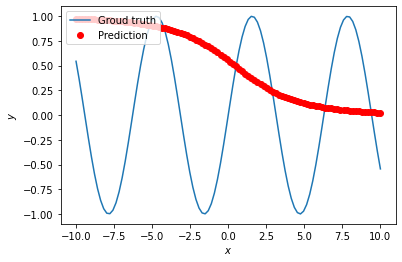

In [10]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), label='Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o',
           c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

predict(sin_net, x_validation, y_validation)

In [0]:
optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.001)

In [0]:
def loss(pred, target):
  squares = (target - pred) ** 2
  return squares.mean()

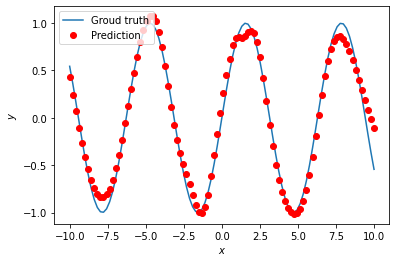

In [16]:
for epoch_index in range(5000):
  optimizer.zero_grad()

  y_pred = sin_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sin_net, x_validation, y_validation)